# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

1. 정류장 / 노선수의 이용자수 관계 - 서대문구
2. 주거형인 지역에 버스정류장을 설치하자 
3. 승하차의 총 승객수가 비례한지 비교하고 비례하지 않다면 수요에 맞게   버스 시설 추가 - 승차 총 승객수와 하차 총 승객수는 연관이 있다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
import scipy.stats as spst

# 한글 폰트 적용
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')   

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [6]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
0,11010,21.867754,46.046219,5471640,1.152145e+07
1,11020,21.524817,46.214336,5368440,1.152618e+07
2,11030,21.820458,38.412082,4959790,8.731066e+06
3,11040,22.150334,44.717847,5139830,1.037646e+07
4,11050,22.810568,50.043326,5020720,1.101479e+07


In [7]:
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business.head()

In [8]:
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people.head()

In [9]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [10]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [11]:
# df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [12]:
# df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [13]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07


In [14]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831
평균 이동 시간(분)_x,0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281
이동인구(합)_x,0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787
평균 이동 시간(분)_y,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

    ? 정해진게 없나요? - 네 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다


    ? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다


    ? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (조당 최소 3개) 
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 주거형인 지역에 버스정류장을 설치하자 

* 가설 2 : 정류장/노선 수의 이용자수 관계

* 가설 3 : 이동시간과 이용자수 관계

## 2.단변량 분석 
(조별로 3개 정도의 변수만 진행해주세요)

+ 변수의 의미  

+ 숫자? 범주?

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용 정리  

+ 추가 분석해볼 사항 도출

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


### 1)

### 2) 정류장/노선 수의 이용자수 관계

In [15]:
target = '자치구'
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '이동인구(합)_x', '이동인구(합)_y']

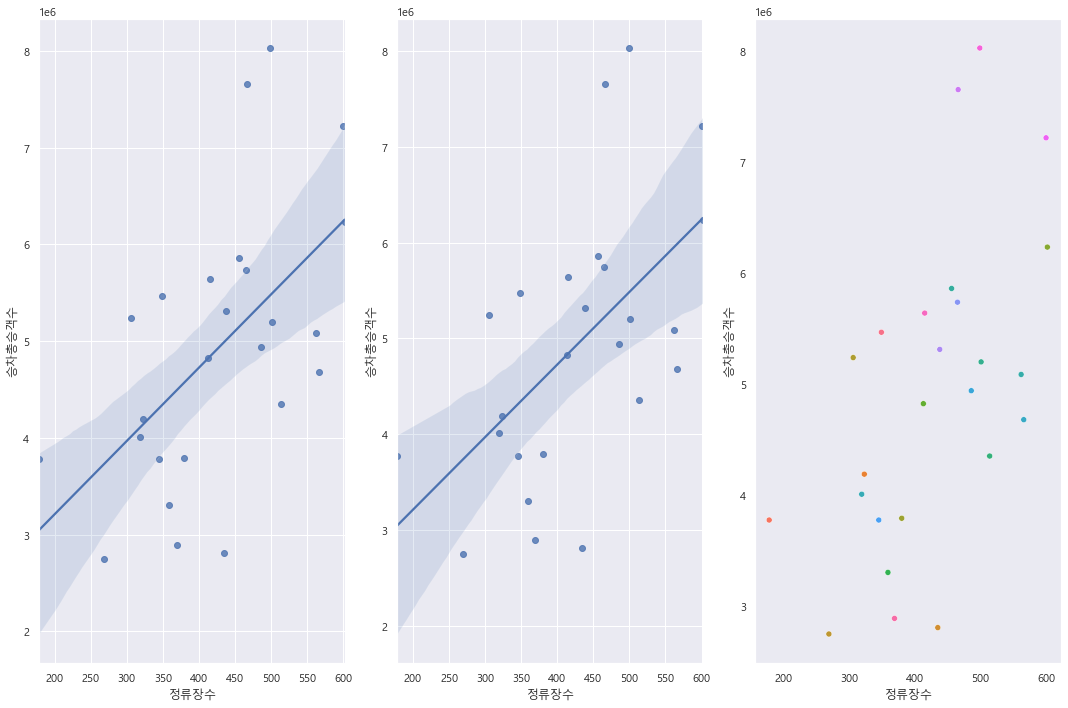

승차총승객수 : (0.5666813370974585, 0.003141977397117322)


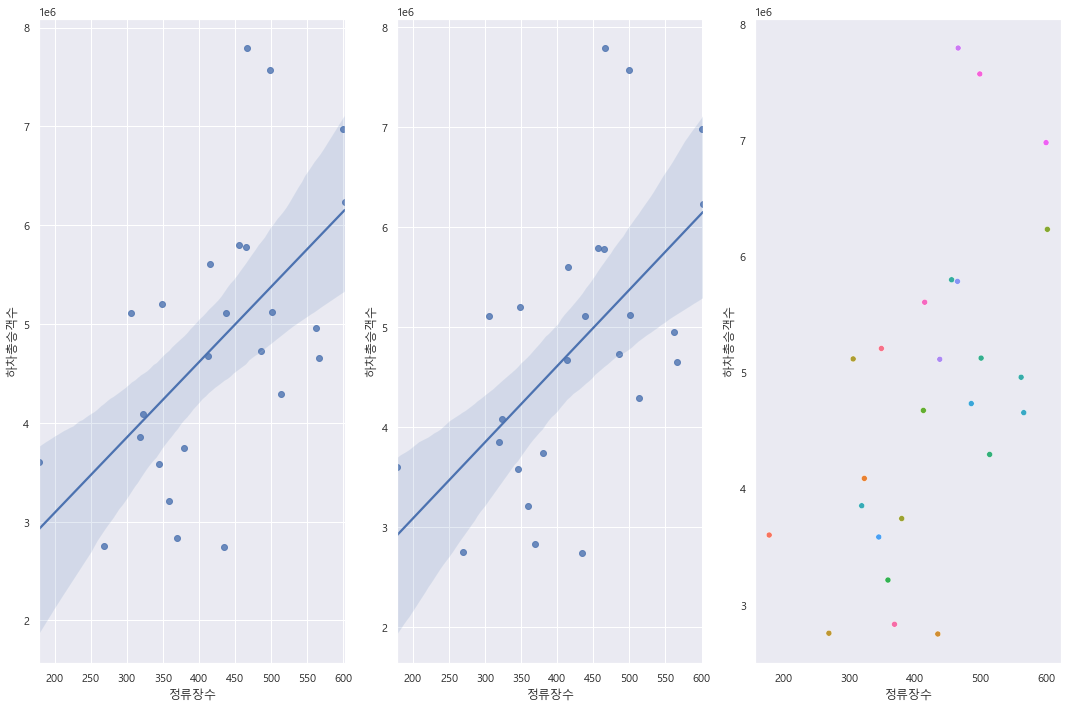

하차총승객수 : (0.5784790149467576, 0.0024518332034538645)


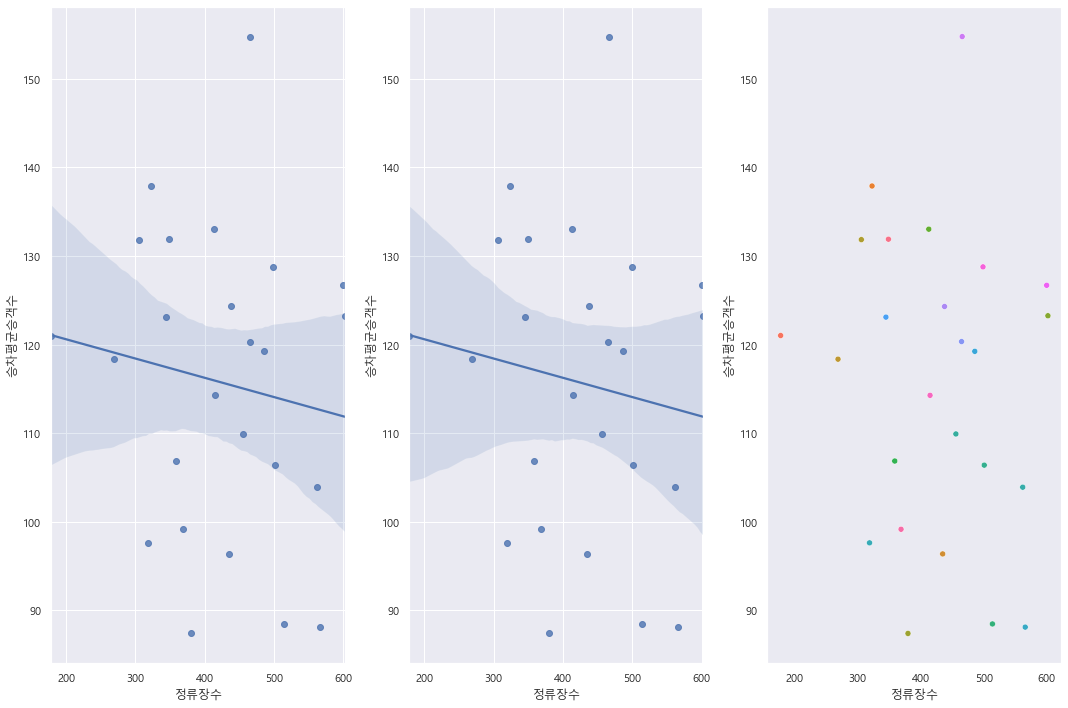

승차평균승객수 : (-0.13531841122802118, 0.5189725687303919)


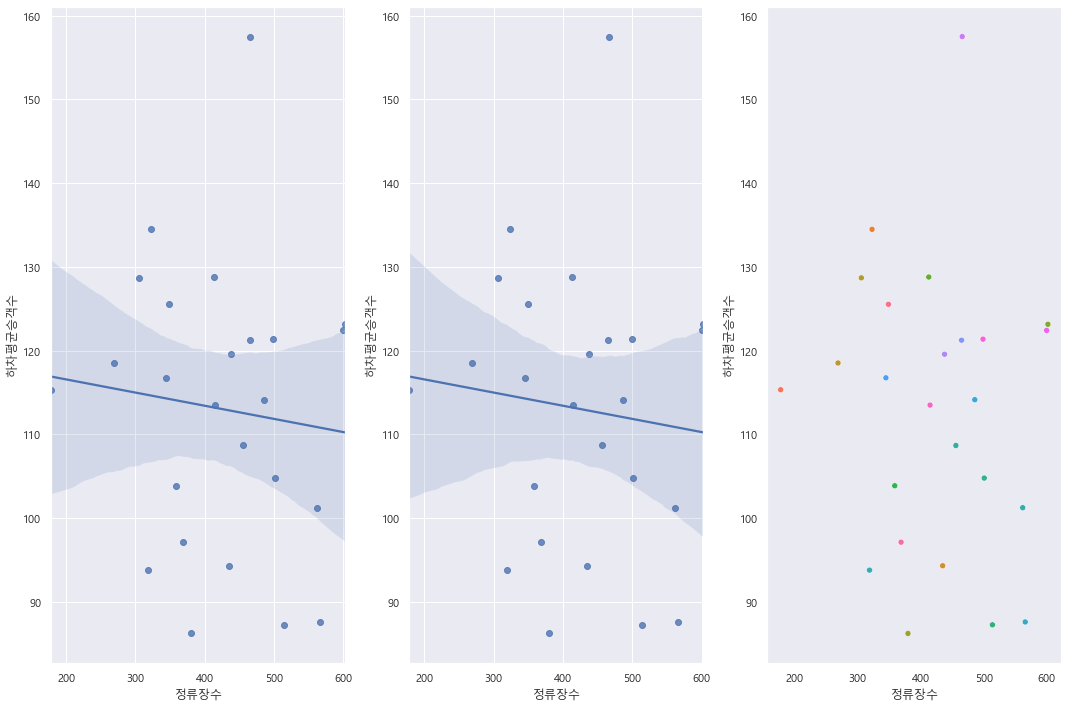

하차평균승객수 : (-0.09914592134749217, 0.6372731779895093)


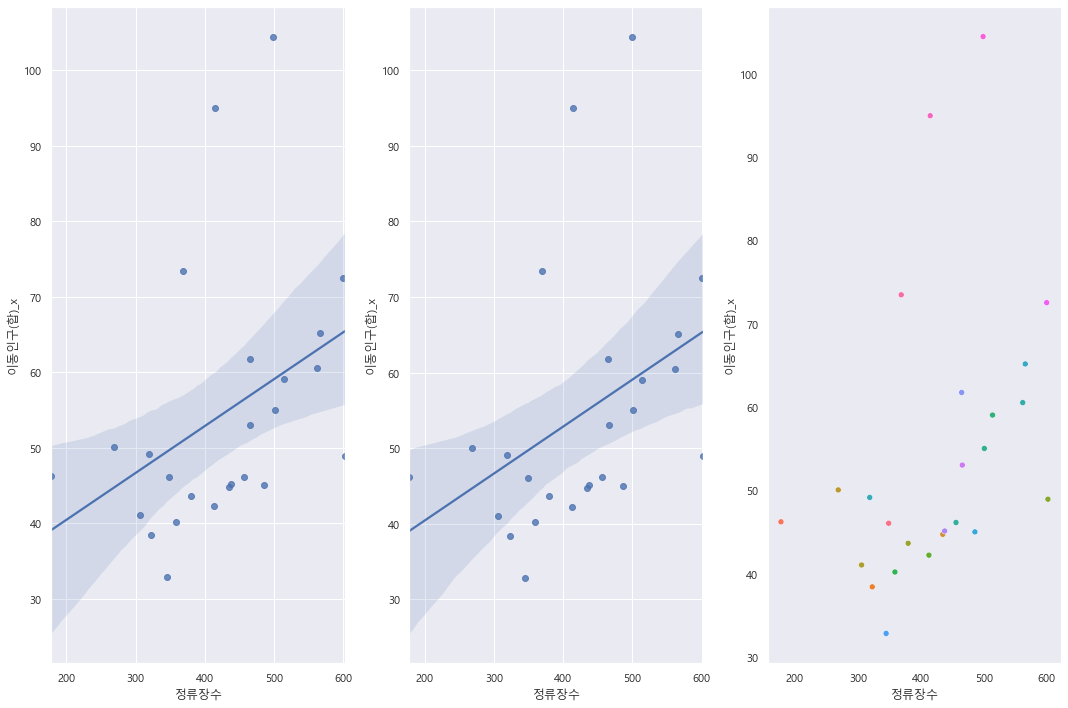

이동인구(합)_x : (0.38714127066297904, 0.05588590941970364)


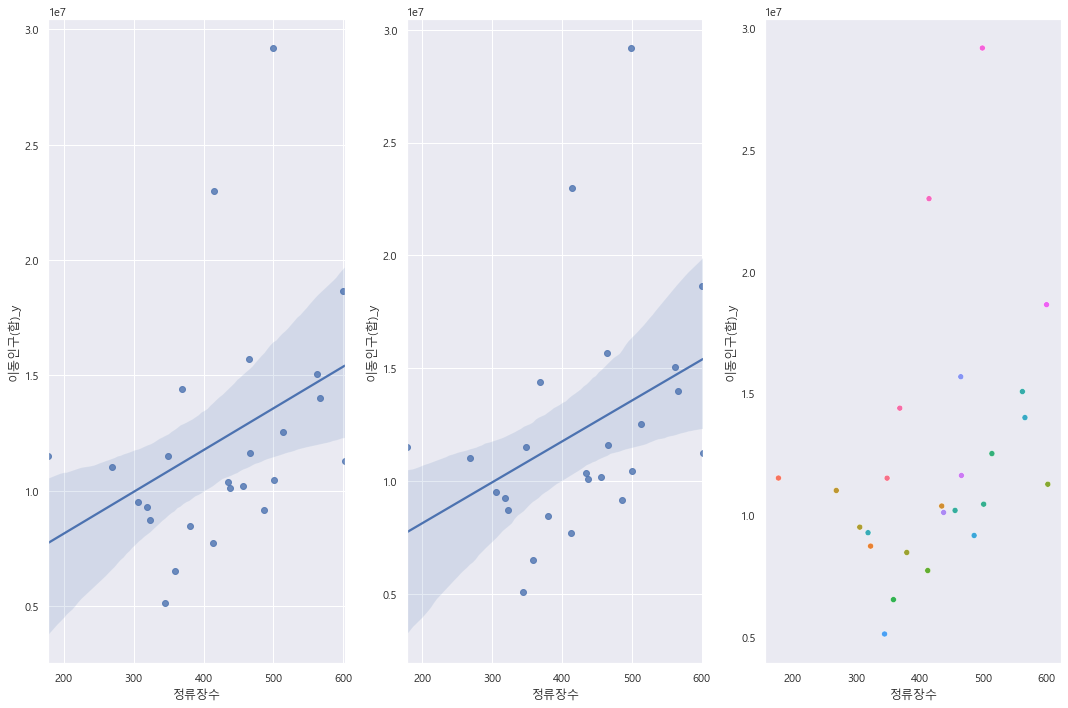

이동인구(합)_y : (0.3706051327327545, 0.06819375756357689)


In [16]:
# 정류장 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=df, x='정류장수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=df, x='정류장수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=df, x='정류장수', y=i, hue=target, legend=False)
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    result = spst.pearsonr(df['정류장수'], df[i])
    print(f'{i} : {result}')

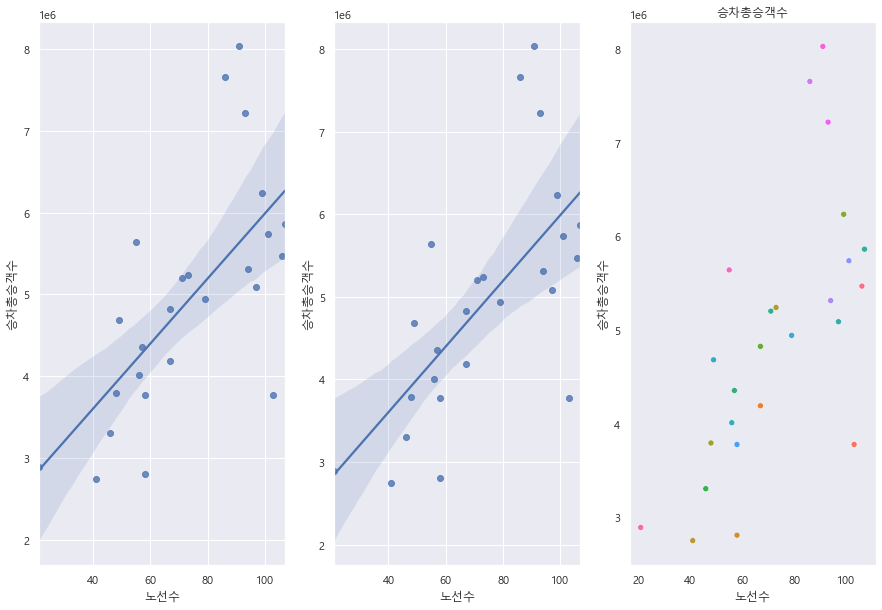

승차총승객수 : (0.6654877832095702, 0.0002830862285771981)


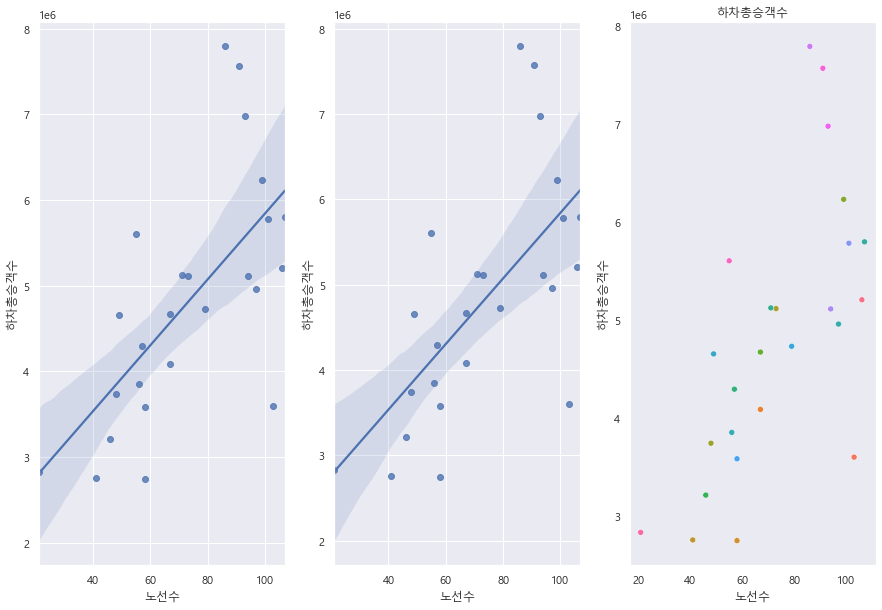

하차총승객수 : (0.6526422720355217, 0.00040610118937178525)


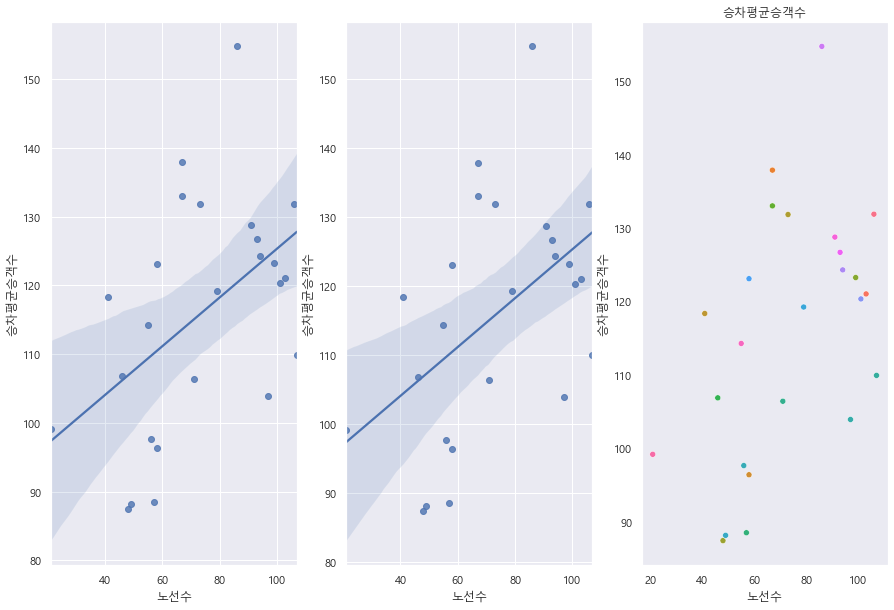

승차평균승객수 : (0.4935407909274122, 0.012170019218131729)


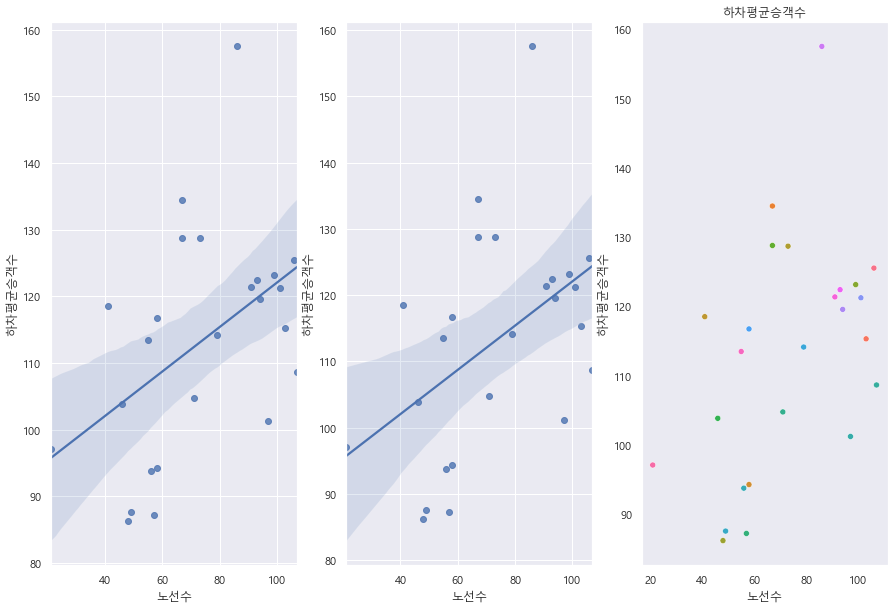

하차평균승객수 : (0.4704401254149345, 0.017632441540646464)


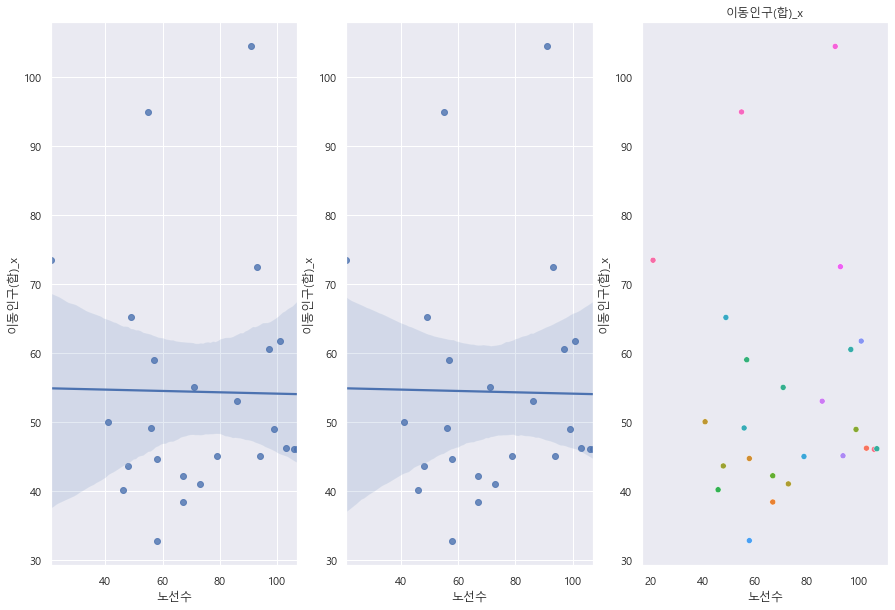

이동인구(합)_x : (-0.013633265773982425, 0.9484293852806779)


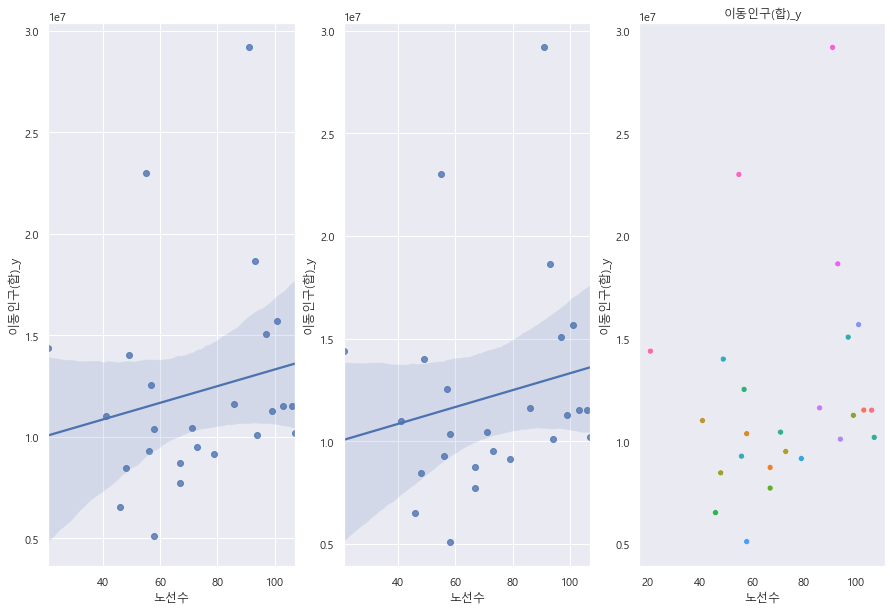

이동인구(합)_y : (0.1881968664250768, 0.3676430942467749)


In [17]:
# 노선 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=df, x='노선수', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=df, x='노선수', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=df, x='노선수', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()
    
    result = spst.pearsonr(df['노선수'], df[i])
    print(f'{i} : {result}')

In [19]:
# 자치구별 하나의 정류장/노선 당 이용자
df['승차승객/정류장수'] = df['승차총승객수'] / df['정류장수']
df['하차승객/정류장수'] = df['하차총승객수'] / df['정류장수']

df['승차승객/노선수'] = df['승차총승객수'] / df['노선수']
df['하차승객/노선수'] = df['하차총승객수'] / df['노선수']
df['승차평균승객수/노선수'] = df['승차평균승객수'] / df['노선수']
df['하차평균승객수/노선수'] = df['하차평균승객수'] / df['노선수']

df[['승차승객/정류장수' , '하차승객/정류장수', '승차승객/노선수' , '하차승객/노선수', '승차평균승객수/노선수', '하차평균승객수/노선수']].describe()

,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,승차평균승객수/노선수,하차평균승객수/노선수
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,11922.706529,11633.129072,71363.061299,69811.839657,1.776745,1.737546
std,3377.156483,3232.972114,20555.684617,20471.192599,0.752622,0.742571
min,6453.517241,6314.340230,36666.747573,34941.087379,1.027238,1.015581
25%,9980.371053,9734.551440,56830.445545,57259.514851,1.322298,1.272036
50%,11683.246973,11311.823245,71592.357143,68770.946429,1.661679,1.625843
75%,12972.065015,12712.631579,77648.709677,75310.947368,1.985379,1.922261
max,21217.275281,20218.719101,137621.571429,134786.000000,4.721962,4.624670


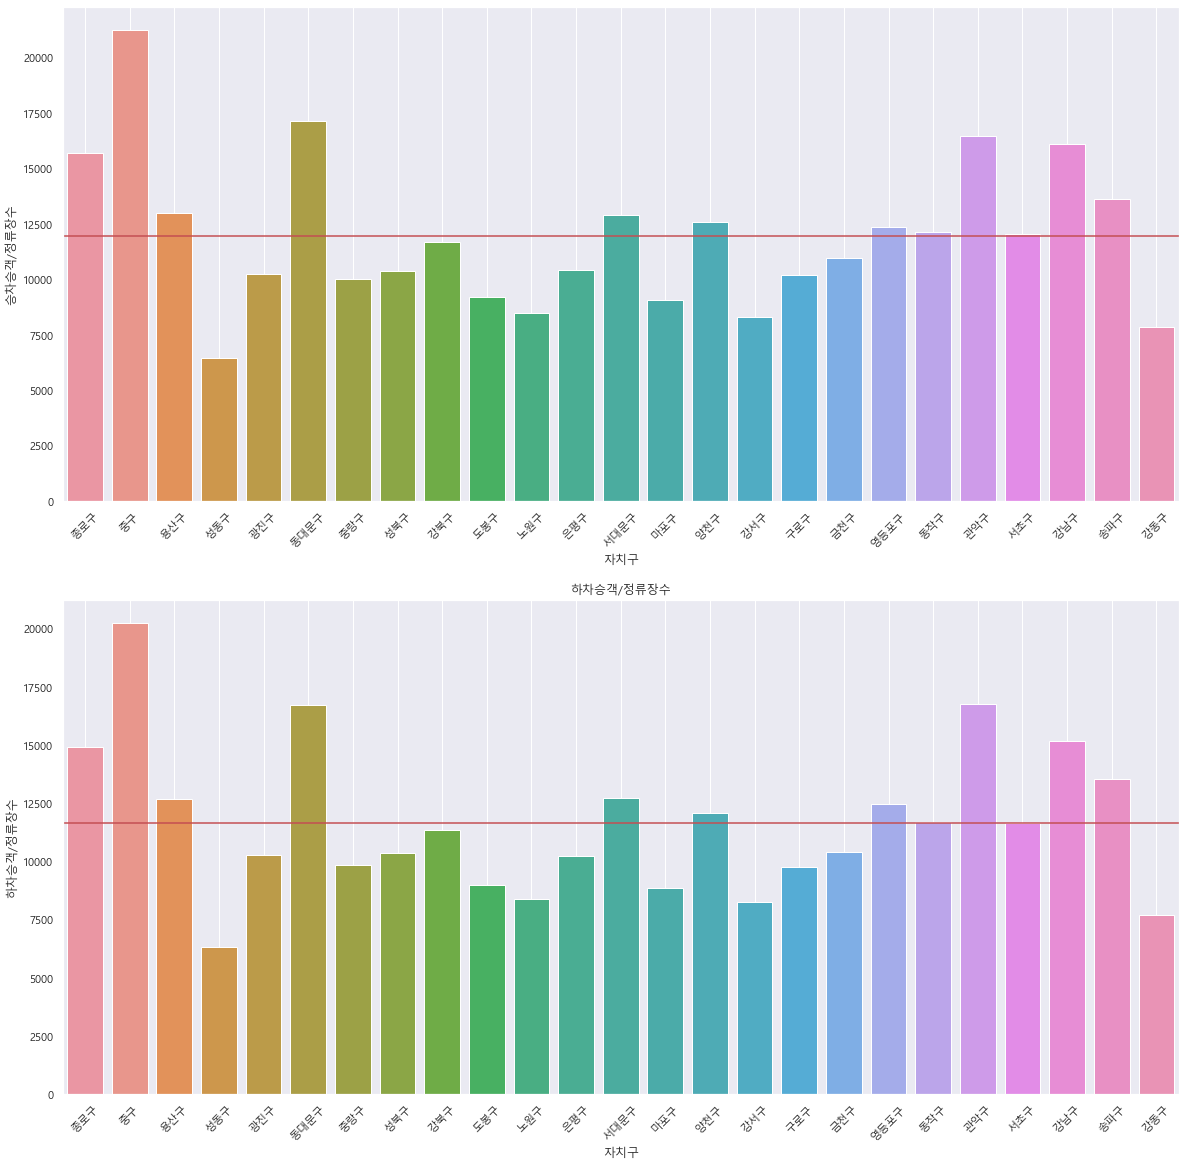

In [25]:
# 자치구별 1 정류장 당 이용자
li = ['승차승객/정류장수' , '하차승객/정류장수']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,1,count)
    sns.barplot(data=df, x=target, y = i)
    plt.axhline(df[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [29]:
# ['승차승객/정류장수' , '하차승객/정류장수']
tmp1 = df.loc[(df['승차승객/정류장수'] > df['승차승객/정류장수'].mean())
                        & (df['하차승객/정류장수'] > df['하차승객/정류장수'].mean())]

tmp1[['자치구', '승차승객/정류장수', '하차승객/정류장수']].sort_values(by=['승차승객/정류장수', '하차승객/정류장수'], ascending=False)

,자치구,승차승객/정류장수,하차승객/정류장수
1,중구,21217.275281,20218.719101
5,동대문구,17126.029412,16716.924837
20,관악구,16428.796137,16722.051502
22,강남구,16093.152305,15168.763527
0,종로구,15670.300860,14915.169054
23,송파구,13594.559036,13502.380723
2,용산구,12972.065015,12651.622291
12,서대문구,12858.550439,12712.631579
14,양천구,12567.937304,12072.642633
18,영등포구,12343.817204,12437.012903


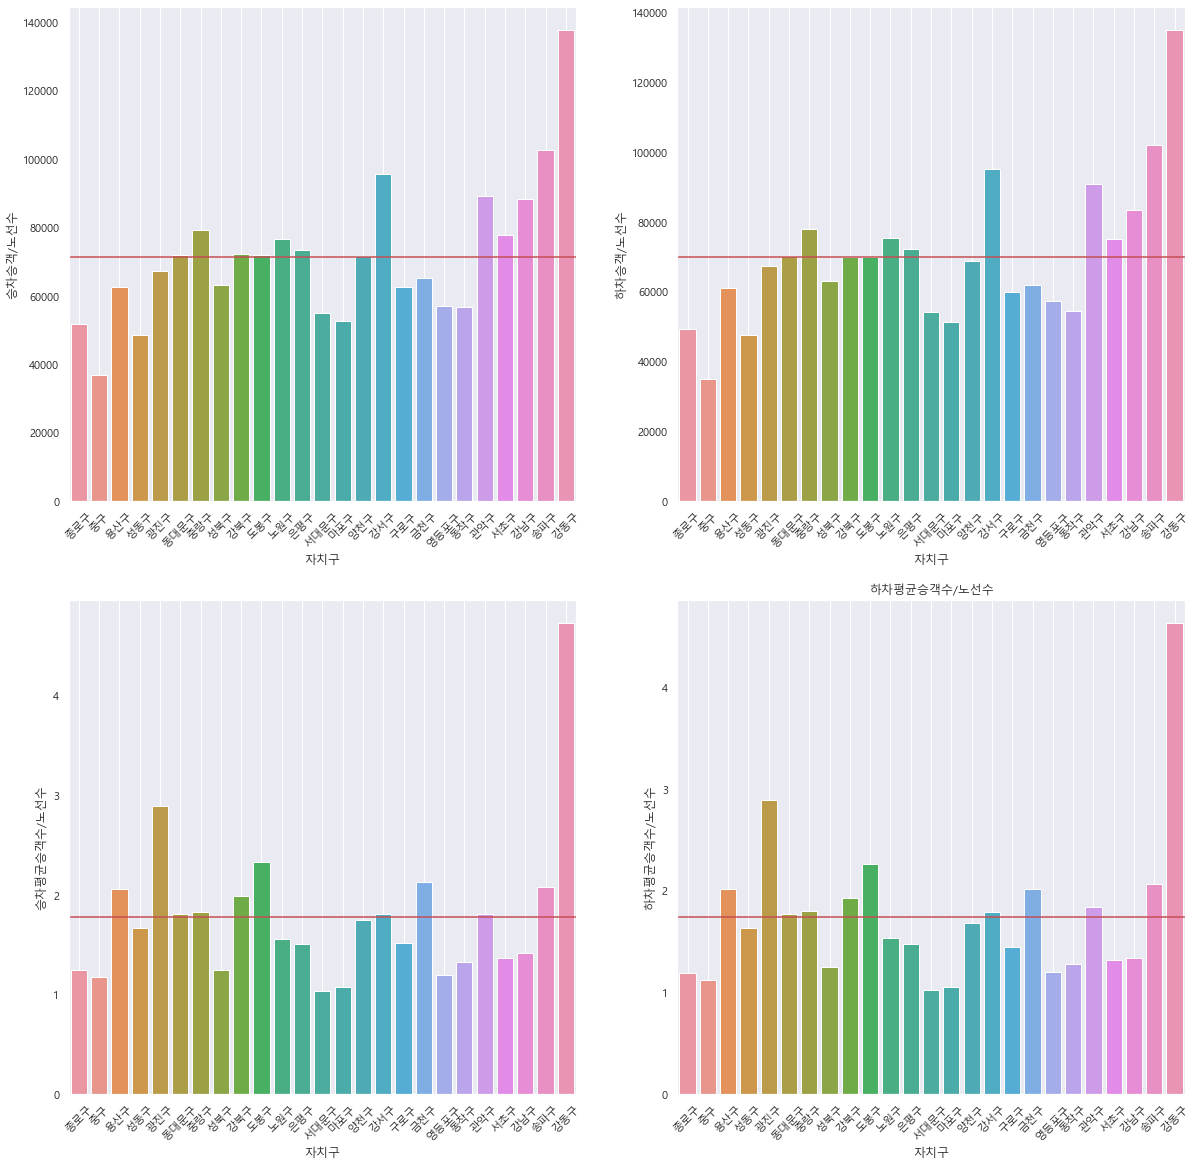

In [88]:
# 자치구별 1 노선 당 이용자
li = ['승차승객/노선수' , '하차승객/노선수', '승차평균승객수/노선수', '하차평균승객수/노선수']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,2,count)
    sns.barplot(data=df, x=target, y = i)
    plt.axhline(df[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [23]:
# ['승차승객/노선수' , '하차승객/노선수', '승차평균승객수/노선수', '하차평균승객수/노선수']
tmp2 = df.loc[(df['승차승객/노선수'] > df['승차승객/노선수'].mean())
                        & (df['하차승객/노선수'] > df['하차승객/노선수'].mean())
                        & (df['승차평균승객수/노선수'] > df['승차평균승객수/노선수'].mean())
                        & (df['하차평균승객수/노선수'] > df['하차평균승객수/노선수'].mean())
                        ]
tmp2

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,승차평균승객수/노선수,하차평균승객수/노선수
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,17126.029412,16716.924837,71788.561644,70073.684932,1.806047,1.762904
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.887741,43.639157,4635870,8.469008e+06,9980.371053,9844.534211,79011.270833,77935.895833,1.820914,1.796130
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.138206,40.194257,4086140,6.533456e+06,9204.192201,8945.462396,71832.717391,69813.500000,2.323029,2.257729
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,25.520396,65.157973,5486630,1.400831e+07,8270.464664,8220.544170,95532.306122,94955.673469,1.798357,1.787502
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,23.480725,53.024888,5150450,1.163090e+07,16428.796137,16722.051502,89021.151163,90610.186047,1.799461,1.831582
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,25.735699,94.938240,6234190,2.299774e+07,13594.559036,13502.380723,102577.127273,101881.600000,2.077638,2.063550
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,25.931701,73.450836,5082380,1.439570e+07,7832.121951,7670.747967,137621.571429,134786.000000,4.721962,4.624670


In [90]:
tmp = df.loc[(df['승차승객/정류장수'] > df['승차승객/정류장수'].mean())
                        & (df['하차승객/정류장수'] > df['하차승객/정류장수'].mean())
                        & (df['승차승객/노선수'] > df['승차승객/노선수'].mean())
                        & (df['하차승객/노선수'] > df['하차승객/노선수'].mean())
                        & (df['승차평균승객수/노선수'] > df['승차평균승객수/노선수'].mean())
                        & (df['하차평균승객수/노선수'] > df['하차평균승객수/노선수'].mean())]

df.loc[df['자치구'].isin(tmp['자치구'])][['자치구', '승차승객/정류장수', '하차승객/정류장수', '승차승객/노선수','하차승객/노선수', '승차평균승객수/노선수', '하차평균승객수/노선수']]

,자치구,승차승객/정류장수,하차승객/정류장수,승차승객/노선수,하차승객/노선수,승차평균승객수/노선수,하차평균승객수/노선수
5,동대문구,17126.029412,16716.924837,71788.561644,70073.684932,1.806047,1.762904
20,관악구,16428.796137,16722.051502,89021.151163,90610.186047,1.799461,1.831582
23,송파구,13594.559036,13502.380723,102577.127273,101881.600000,2.077638,2.063550


### 3) 이동시간과 이용자수 관계

In [91]:
use = ['승차총승객수','하차총승객수','승차평균승객수','하차평균승객수', '이동인구(합)_x', '이동인구(합)_y']

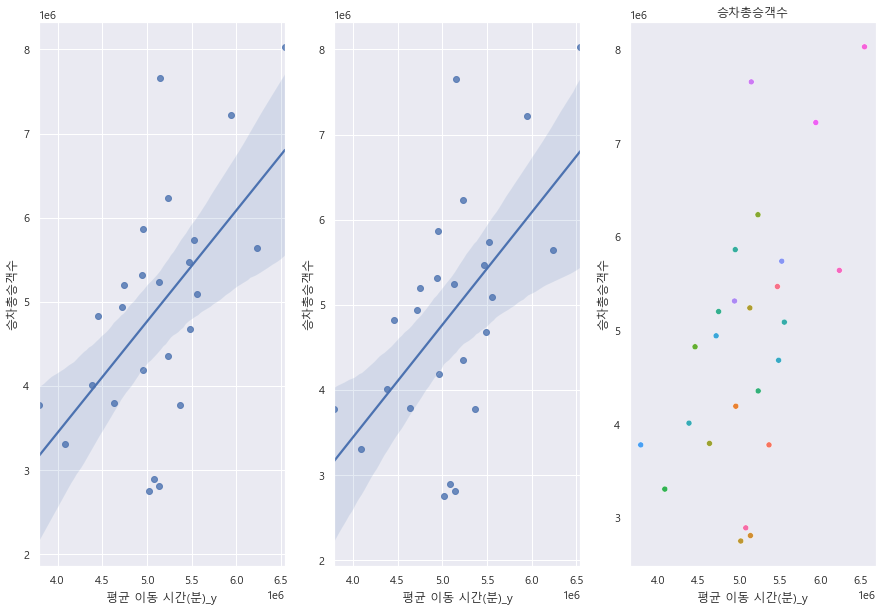

승차총승객수 : (0.5724552800494243, 0.0027860212407388707)


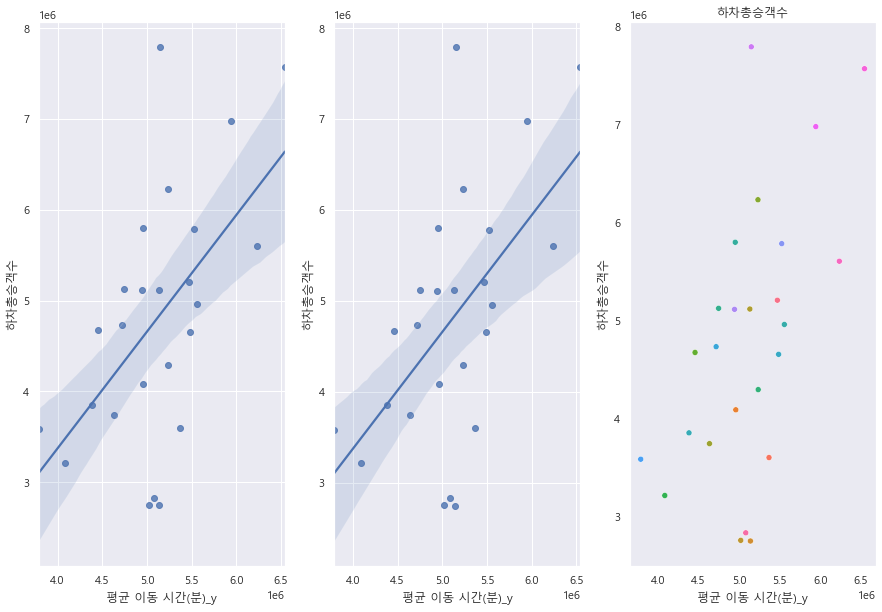

하차총승객수 : (0.5646077278588446, 0.0032789030052818168)


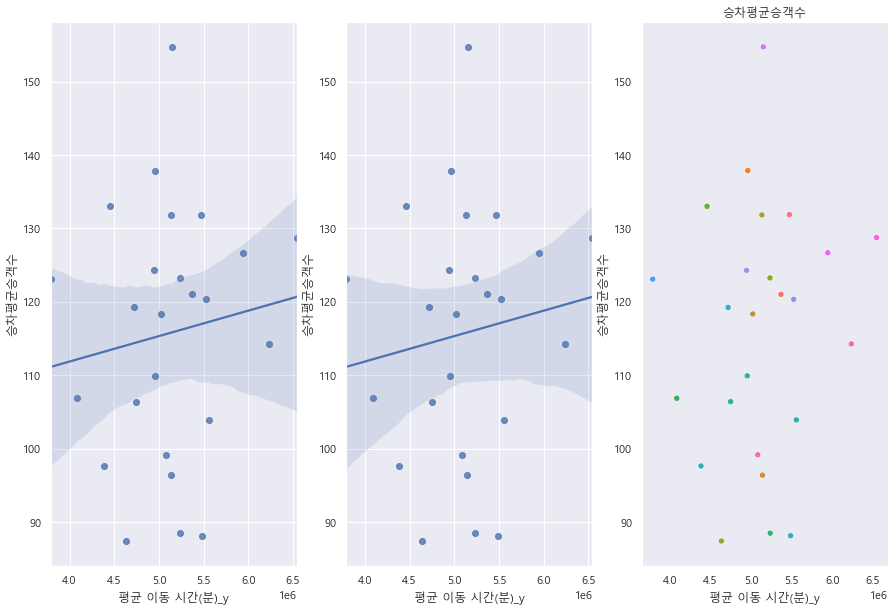

승차평균승객수 : (0.1249978636308549, 0.5516196902042232)


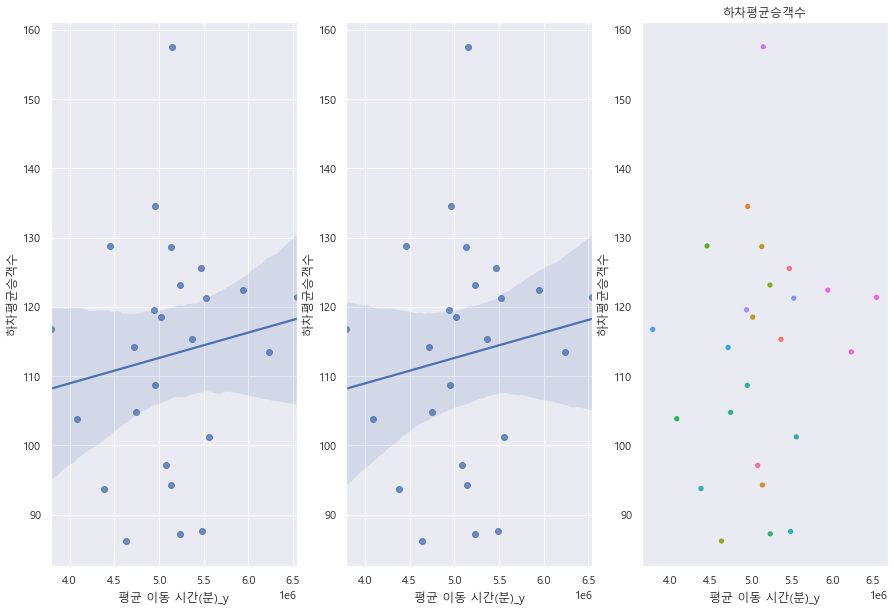

하차평균승객수 : (0.13385942236046794, 0.5235305937650055)


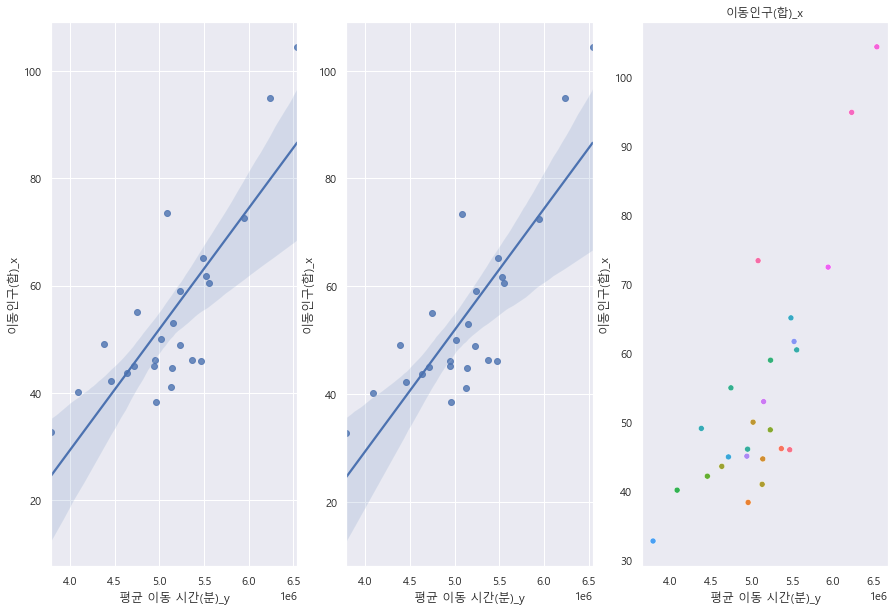

이동인구(합)_x : (0.8126464967199349, 8.018995607574313e-07)


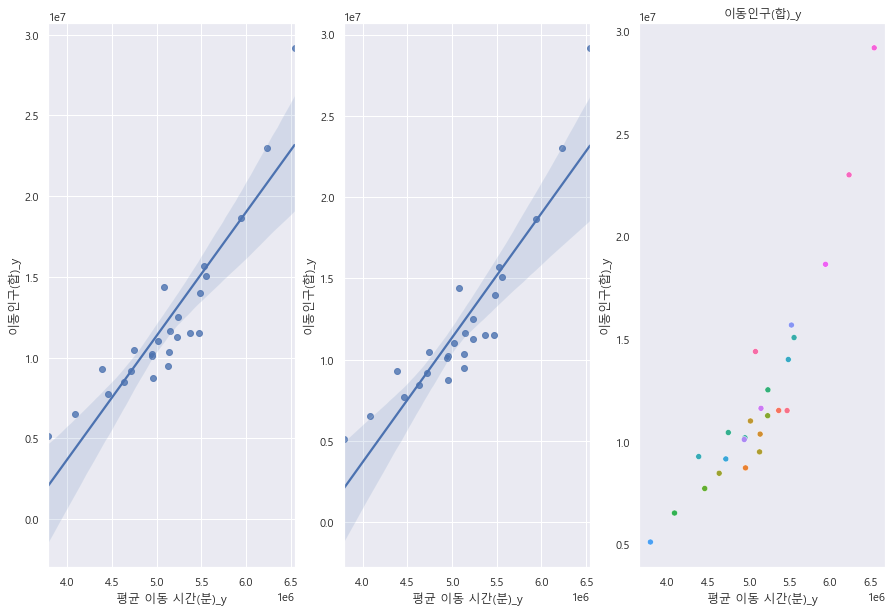

이동인구(합)_y : (0.908127793159686, 3.6156796387971715e-10)


In [92]:
# 평균 이동 시간(분)_x 별 승하차
for i in use:
    plt.figure(figsize=(15,10))
    plt.subplot(1,3,1)
    sns.regplot(data=df, x='평균 이동 시간(분)_y', y=i)
    plt.subplot(1,3,2)
    sns.regplot(data=df, x='평균 이동 시간(분)_y', y=i)
    plt.subplot(1,3,3)
    sns.scatterplot(data=df, x='평균 이동 시간(분)_y', y=i, hue=target, legend=False)
    plt.grid()
    plt.title(i)
    plt.show()

    result = spst.pearsonr(df['평균 이동 시간(분)_y'], df[i])
    print(f'{i} : {result}')

In [93]:
# 자치구별 이동 시간(분당) 이용자수

df['승차승객/평균 이동 시간(분)_y'] = df['승차총승객수'] / df['평균 이동 시간(분)_y']
df['하차승객/평균 이동 시간(분)_y'] = df['하차총승객수'] / df['평균 이동 시간(분)_y']
df['이동인구(합)_x/평균 이동 시간(분)_y'] = df['이동인구(합)_x'] / df['평균 이동 시간(분)_y']
df['이동인구(합)_y/평균 이동 시간(분)_y'] = df['이동인구(합)_y'] / df['평균 이동 시간(분)_y']

df[['승차승객/평균 이동 시간(분)_y', '하차승객/평균 이동 시간(분)_y', '이동인구(합)_x/평균 이동 시간(분)_y', '이동인구(합)_y/평균 이동 시간(분)_y']].describe()

,승차승객/평균 이동 시간(분)_y,하차승객/평균 이동 시간(분)_y,이동인구(합)_x/평균 이동 시간(분)_y,이동인구(합)_y/평균 이동 시간(분)_y
count,25.000000,25.000000,25.000000,25.000000
mean,0.956706,0.934902,0.000010,2.319319
std,0.226903,0.226074,0.000002,0.676878
min,0.546181,0.534402,0.000008,1.351576
25%,0.831499,0.819929,0.000009,1.943150
50%,0.996569,0.945185,0.000010,2.147026
75%,1.082301,1.047894,0.000011,2.553172
max,1.486437,1.512970,0.000016,4.459551


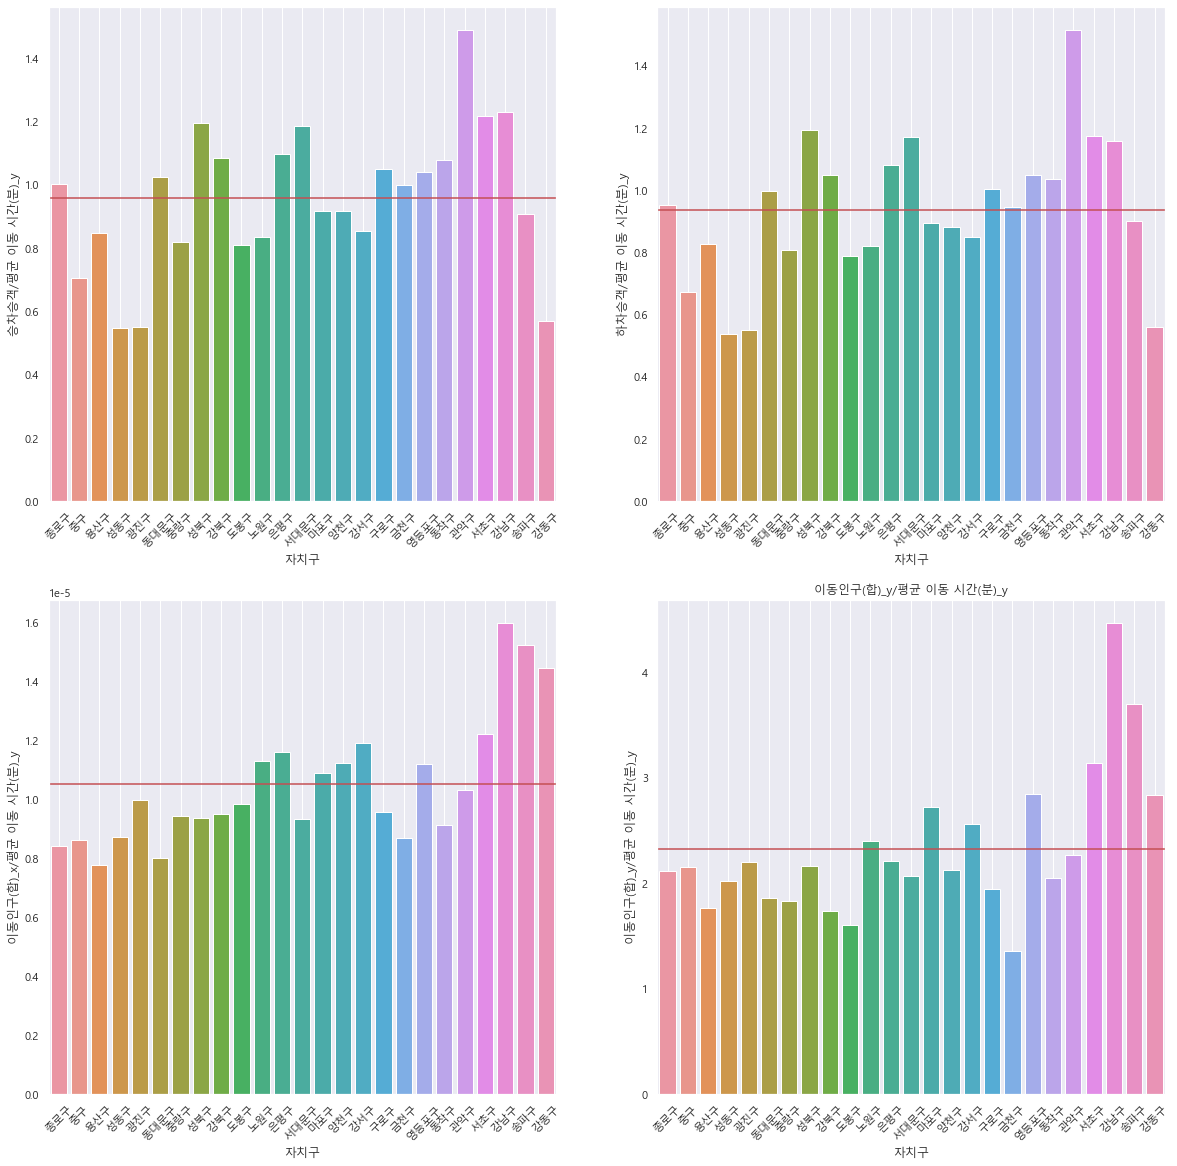

In [94]:
# 자치구별 총 이동 시간 분당 이용자
li = ['승차승객/평균 이동 시간(분)_y', '하차승객/평균 이동 시간(분)_y', '이동인구(합)_x/평균 이동 시간(분)_y', '이동인구(합)_y/평균 이동 시간(분)_y']
count = 1
plt.figure(figsize=(20,20))
for i in li:
    plt.subplot(2,2,count)
    sns.barplot(data=df, x=target, y = i)
    plt.axhline(df[i].mean(), color='r')
    plt.xticks(rotation=45)
    plt.grid()
    count += 1
plt.title(i)
plt.show()

In [95]:
# ['승차승객/평균 이동 시간(분)_y', '하차승객/평균 이동 시간(분)_y', '이동인구(합)_x/평균 이동 시간(분)_y', '이동인구(합)_y/평균 이동 시간(분)_y']
tmp3 = df.loc[(df['승차승객/평균 이동 시간(분)_y'] > df['승차승객/평균 이동 시간(분)_y'].mean())
                        & (df['하차승객/평균 이동 시간(분)_y'] > df['하차승객/평균 이동 시간(분)_y'].mean())
                        & (df['이동인구(합)_x/평균 이동 시간(분)_y'] > df['이동인구(합)_x/평균 이동 시간(분)_y'].mean())
                        & (df['이동인구(합)_y/평균 이동 시간(분)_y'] > df['이동인구(합)_y/평균 이동 시간(분)_y'].mean())
                    ]
tmp3[['자치구', '승차승객/평균 이동 시간(분)_y', '하차승객/평균 이동 시간(분)_y', '이동인구(합)_x/평균 이동 시간(분)_y', '이동인구(합)_y/평균 이동 시간(분)_y']]

,자치구,승차승객/평균 이동 시간(분)_y,하차승객/평균 이동 시간(분)_y,이동인구(합)_x/평균 이동 시간(분)_y,이동인구(합)_y/평균 이동 시간(분)_y
18,영등포구,1.038858,1.046701,0.000011,2.839056
21,서초구,1.214804,1.173862,0.000012,3.136410
22,강남구,1.227186,1.156696,0.000016,4.459551


## 4.관계 정리

##### 가설 2-1 정류장수 별 이용자 ( 상관관계 )
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상의 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.13, 0.09로 관계가 거의 없어 보임
3. 이동인구 평균과 총합의 관계에서 상관계사 0.3 정도의 약간의 관계를 보이지만 pvalue의 값이 0.06, 0.07로 관계가 있다고 보기 힘듬

##### 가설 2-2 노선수 별 이용
1. 승/하차총승객수와 관계에서는 상관계수 0.6 이상의 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.4 정도의 약간의 관계가 있어 보임
3. 이동인구평균의 관계에서는 상관계수 0.0001로 관계가 없어 보임
4. 총이동인구의 관계에서는 상관계수 0.2 정도 관계를 보이지만 pvalue의 값이 0.28로 관계가 있다고 보기 힘듬

##### 가설 3 노선수 별 이용
1. 승/하차총승객수와 관계에서는 상관계수 0.5 이상의 큰 관계가 있어 보임
2. 승/하차평균승객수와 관계에서는 상관계수 0.1 로 관계가 거의 없어 보임
3. 이동인구평균과 총합의 관계에서는 상관계수 0.8, 0.9 이상의 큰 관계가 있어 보임

### 1) 강한 관계의 변수

* 

### 2) 약한 관계의 변수

*

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

### 가설 2 : 정류장과 노선 수 대비 이용자
<p>동대문구/관악구/송파구</p>
<p>정류장과 노선의 수 대비 승/하차객과 이동인구의 상관관계에서 중간 이상의 지표를 가지고</p>
<p>지역구 별 하나의 정류장/노선 당 이용자가 높은 지역을 구함</p>

### 가설 3 : 이동시간 대비 이용자
<p>강남구/서초구/영등포구</p>
<p>총 이동시간 대비 승/하차객과 이동인구의 상관관계에서 관계있는 지표를 가지고</p>
<p>지역구별 분 당 이용자가 높은 지역을 구함</p>

### 가설 1

주거형인지역에 버스정류장을 설치하자

시간대별로 네가지 시간대로 구성했다
1. 출근시간(오전 6 ~ 11)
2. 점심오후시간(낮 11 ~ 오후 4시)
3. 퇴근시간(오후 4 ~ 8시)
4. 밤시간 (오후 8시 ~ 밤 12시)

2030대가 많고 60대이상의 비율이 높은 지역에 버스정류장설치를 해야한다.

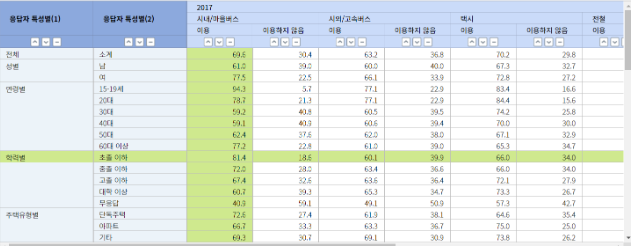

In [96]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [97]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [98]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
0,11010,21.867754,46.046219,5471640,1.152145e+07
1,11020,21.524817,46.214336,5368440,1.152618e+07
2,11030,21.820458,38.412082,4959790,8.731066e+06
3,11040,22.150334,44.717847,5139830,1.037646e+07
4,11050,22.810568,50.043326,5020720,1.101479e+07


In [99]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [100]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [101]:
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y,승하차총승객수
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,10674329
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,7375607
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06,8276451
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07,5554018
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07,5502859
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,10355944
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.887741,43.639157,4635870,8.469008e+06,7533464
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.716321,48.931749,5232500,1.127099e+07,12467662
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,24.355289,42.216319,4458260,7.727739e+06,9496964
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.138206,40.194257,4086140,6.533456e+06,6515726


In [102]:
df['승하차총승객수 / 정류장수'] = df['정류장수'] / df['승하차총승객수'] * 100
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y,승하차총승객수,승하차총승객수 / 정류장수
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,10674329,0.003270
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,7375607,0.002413
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06,8276451,0.003903
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07,5554018,0.007832
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07,5502859,0.004888
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,10355944,0.002955
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.887741,43.639157,4635870,8.469008e+06,7533464,0.005044
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.716321,48.931749,5232500,1.127099e+07,12467662,0.004828
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,24.355289,42.216319,4458260,7.727739e+06,9496964,0.004349
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.138206,40.194257,4086140,6.533456e+06,6515726,0.005510


In [103]:
import pandas as pd

seoul_moving = pd.read_csv('1.2 seoul_moving_month_4.csv',sep=",", index_col = 0, encoding = 'UTF-8')

c:\Users\User\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [104]:
# 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체
seoul_moving.replace("*","2", inplace=True)

In [105]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
seoul_moving = seoul_moving.astype({'이동인구(합)':'float'})
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28923054 entries, 0 to 968462
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.4+ GB


In [106]:
# 출발과 도착이 모두 서울인 데이터만 추출
seoul_moving = seoul_moving[(seoul_moving["출발 시군구 코드"] < 20000) & (seoul_moving["도착 시군구 코드"] < 20000)]

In [107]:
seoul_moving['출발 시군구 코드'] = seoul_moving['출발 시군구 코드'].map({
    11010 : '종로구',
    11020 : '중구',
    11030 : '용산구',
    11040 : '성동구',
    11050 : '광진구',
    11060 : '동대문구',
    11070 : '중랑구',
    11080 : '성북구',
    11090 : '강북구',
    11100 : '도봉구',
    11110 : '노원구',
    11120 : '은평구',
    11130 : '서대문구',
    11140 : '마포구',
    11150 : '양천구',
    11160 : '강서구',
    11170 : '구로구',
    11180 : '금천구',
    11190 : '영등포구',
    11200 : '동작구',
    11210 : '관악구',
    11220 : '서초구',
    11230 : '강남구',
    11240 : '송파구',
    11250 : '강동구'
})

In [108]:
seoul_moving['도착 시군구 코드'] = seoul_moving['도착 시군구 코드'].map({
    11010 : '종로구',
    11020 : '중구',
    11030 : '용산구',
    11040 : '성동구',
    11050 : '광진구',
    11060 : '동대문구',
    11070 : '중랑구',
    11080 : '성북구',
    11090 : '강북구',
    11100 : '도봉구',
    11110 : '노원구',
    11120 : '은평구',
    11130 : '서대문구',
    11140 : '마포구',
    11150 : '양천구',
    11160 : '강서구',
    11170 : '구로구',
    11180 : '금천구',
    11190 : '영등포구',
    11200 : '동작구',
    11210 : '관악구',
    11220 : '서초구',
    11230 : '강남구',
    11240 : '송파구',
    11250 : '강동구'
})

In [109]:
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,0,종로구,종로구,F,0,EE,10,28.02
1,202204,일,0,종로구,종로구,F,0,EH,10,27.52
2,202204,일,0,종로구,종로구,F,0,HE,10,27.83
3,202204,일,0,종로구,종로구,F,10,HW,10,6.05
4,202204,일,0,종로구,종로구,F,10,EH,90,5.95


In [110]:
#도착시간 0부터 4까지(0:00 ~ 5:59) 제거
index = seoul_moving[seoul_moving['도착시간'] <=5].index
seoul_moving.drop(index, inplace=True)

In [111]:
seoul_moving.reset_index(drop=True, inplace=True)
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202204,일,6,은평구,마포구,F,35,WE,10,3.03
1,202204,일,6,은평구,마포구,F,35,HE,20,3.04
2,202204,일,6,은평구,마포구,F,35,WH,10,3.04
3,202204,일,6,은평구,마포구,F,40,HE,10,6.86
4,202204,일,6,은평구,마포구,F,40,HW,20,6.88
...,...,...,...,...,...,...,...,...,...,...
5347105,202204,토,23,강동구,강동구,M,80,WH,10,85.10
5347106,202204,토,23,강동구,강동구,M,80,EH,10,28.36
5347107,202204,토,23,강동구,강동구,M,80,EE,20,37.99
5347108,202204,토,23,강동구,강동구,M,80,HE,10,9.42


In [112]:
df1 = seoul_moving[(seoul_moving['도착시간'] >= 6) & (seoul_moving['도착시간'] <11)][['도착 시군구 코드']].value_counts()
df2 = seoul_moving[(seoul_moving['도착시간'] >= 6) & (seoul_moving['도착시간'] <11)][['출발 시군구 코드']].value_counts()

In [113]:
df1 = pd.DataFrame(df1)
df1 = df1.rename(columns={0 : '출근시간 승차인원'})

In [114]:
df2 = pd.DataFrame(df2)
df2 = df2.rename(columns={0 : '출근시간 하차인원'})

In [115]:
df3 = seoul_moving[(seoul_moving['도착시간'] >= 11) & (seoul_moving['도착시간'] <16)][['도착 시군구 코드']].value_counts()
df4 = seoul_moving[(seoul_moving['도착시간'] >= 11) & (seoul_moving['도착시간'] <16)][['출발 시군구 코드']].value_counts()

In [116]:
df3 = pd.DataFrame(df3)
df3 = df3.rename(columns={0 : '점심오후시간 승차인원'})

In [117]:
df4 = pd.DataFrame(df4)
df4 = df4.rename(columns={0 : '점심오후 하차인원'})

In [118]:
df5 = seoul_moving[(seoul_moving['도착시간'] >= 16) & (seoul_moving['도착시간'] <20)][['도착 시군구 코드']].value_counts()
df6 = seoul_moving[(seoul_moving['도착시간'] >= 16) & (seoul_moving['도착시간'] <20)][['출발 시군구 코드']].value_counts()

In [119]:
df5 = pd.DataFrame(df5)
df5 = df5.rename(columns={0 : '퇴근시간 승차인원'})

In [120]:
df6 = pd.DataFrame(df6)
df6 = df6.rename(columns={0 : '퇴근시간 하차인원'})

In [121]:
df7 = seoul_moving[(seoul_moving['도착시간'] >= 20) & (seoul_moving['도착시간'] <24)][['도착 시군구 코드']].value_counts()
df8 = seoul_moving[(seoul_moving['도착시간'] >= 20) & (seoul_moving['도착시간'] <24)][['출발 시군구 코드']].value_counts()

In [122]:
df7 = pd.DataFrame(df7)
df7 = df7.rename(columns={0 : '밤시간 승차인원'})

In [123]:
df8 = pd.DataFrame(df8)
df8 = df8.rename(columns={0 : '밤시간 하차인원'})

In [124]:
df_total = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8],axis=1)

In [125]:
df_total

,출근시간 승차인원,출근시간 하차인원,점심오후시간 승차인원,점심오후 하차인원,퇴근시간 승차인원,퇴근시간 하차인원,밤시간 승차인원,밤시간 하차인원
강남구,51443,55476,91968,102457,83794,93934,43917,54615
강동구,32170,36267,62558,74225,60719,58157,34621,34879
강북구,29644,31827,57000,58260,57704,53580,33853,26984
강서구,38405,38396,70496,69943,64462,62164,35749,33310
관악구,37353,39323,71701,70869,66973,68574,37600,37870
광진구,37950,35733,71603,62078,66649,64721,37771,36690
구로구,34969,36471,67233,68141,63261,60622,33098,33723
금천구,28640,26807,50591,53675,48099,50725,25422,27109
노원구,34861,36094,68363,70820,65053,62298,38221,34980
도봉구,25536,27466,51151,55760,51369,47141,30157,21548


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

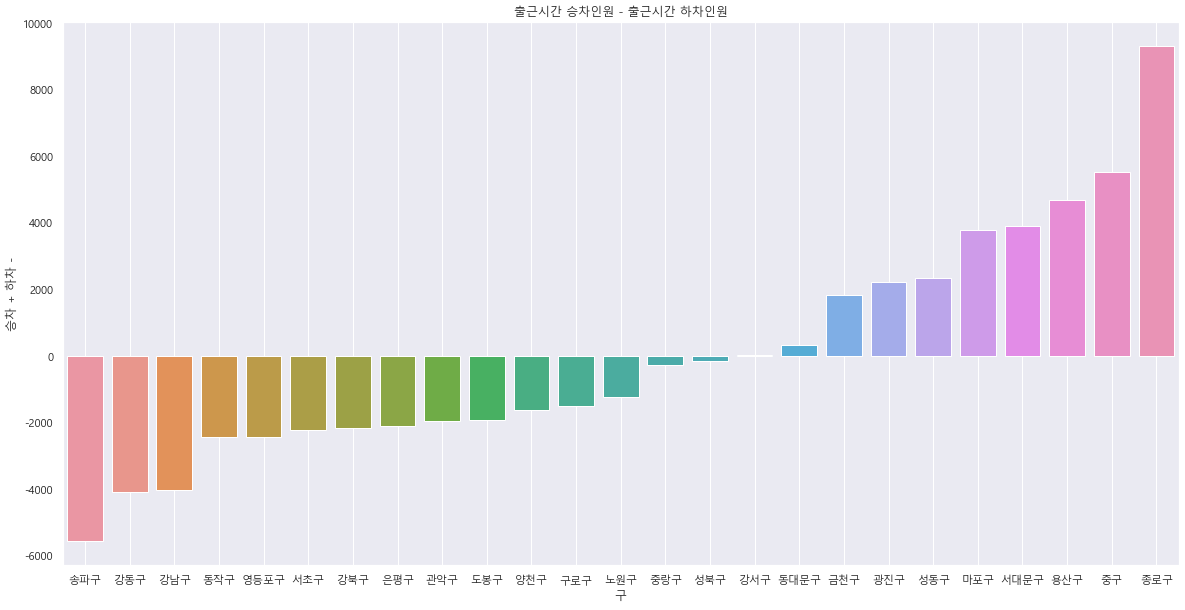

In [127]:
df_ =df_total['출근시간 승차인원'] - df_total['출근시간 하차인원']
df_ = df_.reset_index() 
df_ = df_.sort_values(by=0)
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
sns.barplot(x=df_['level_0'], y=df_[0],data=df_)
plt.title('출근시간 승차인원 - 출근시간 하차인원')
plt.xlabel('구')
plt.ylabel('승차 + 하차 -')
plt.grid()
plt.show()

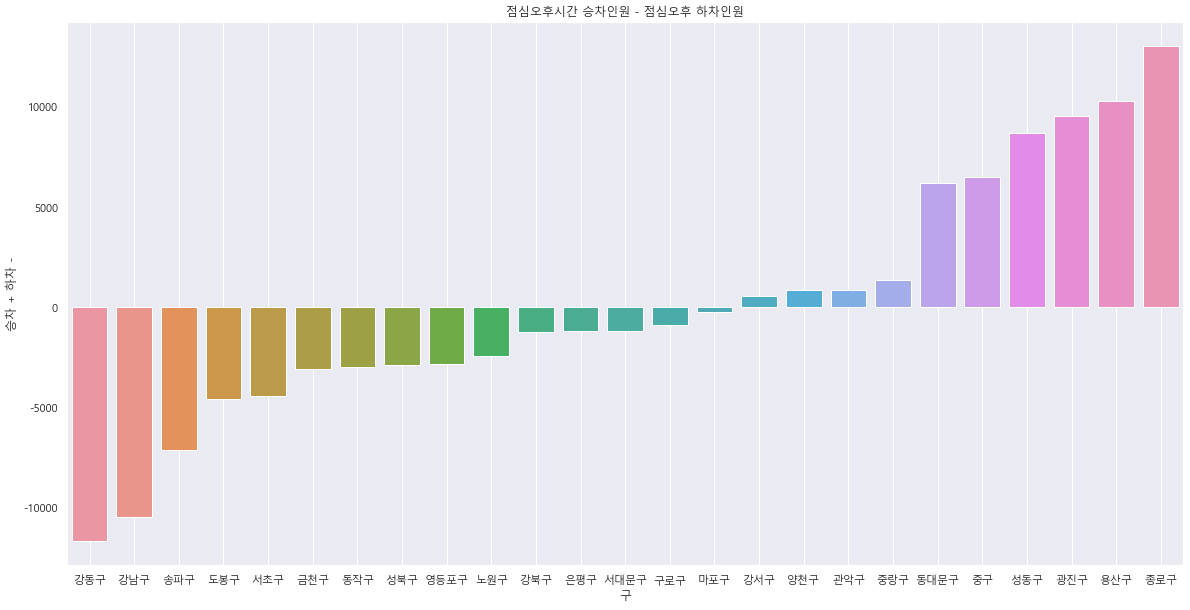

In [128]:
df__ =df_total['점심오후시간 승차인원'] - df_total['점심오후 하차인원']
df__ = df__.reset_index() 
df__ = df__.sort_values(by=0)
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
sns.barplot(x=df__['level_0'], y=df__[0],data=df__)
plt.title('점심오후시간 승차인원 - 점심오후 하차인원')
plt.xlabel('구')
plt.ylabel('승차 + 하차 -')
plt.grid()
plt.show()

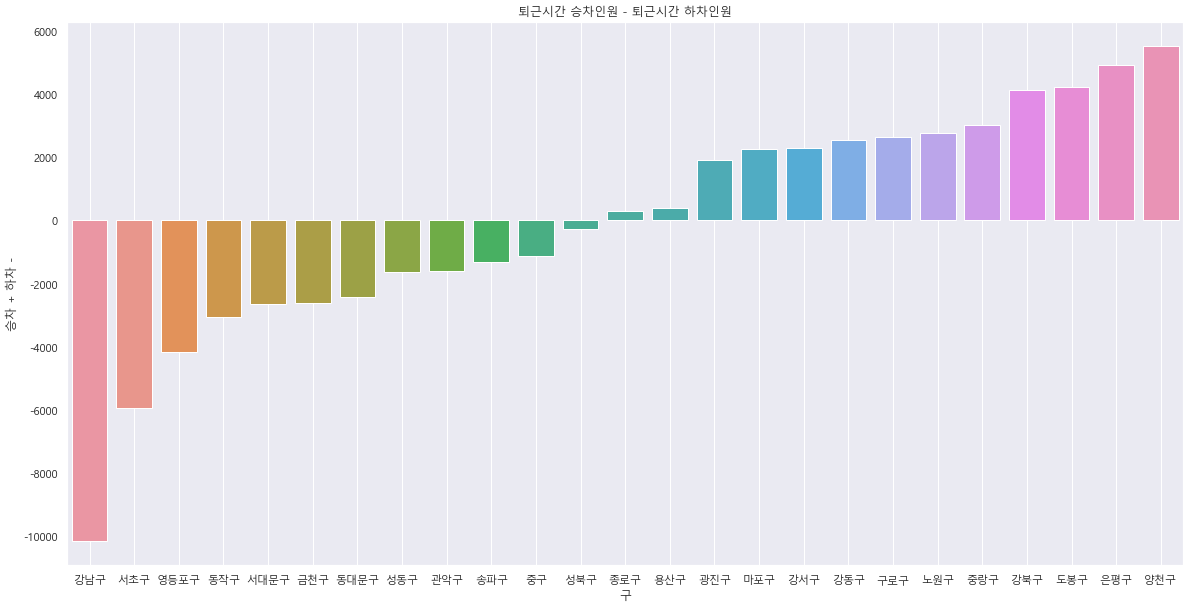

In [129]:
df___ =df_total['퇴근시간 승차인원'] - df_total['퇴근시간 하차인원']
df___ = df___.reset_index() 
df___ = df___.sort_values(by=0)
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
sns.barplot(x=df___['level_0'], y=df___[0],data=df___)
plt.title('퇴근시간 승차인원 - 퇴근시간 하차인원')
plt.xlabel('구')
plt.ylabel('승차 + 하차 -')
plt.grid()
plt.show()

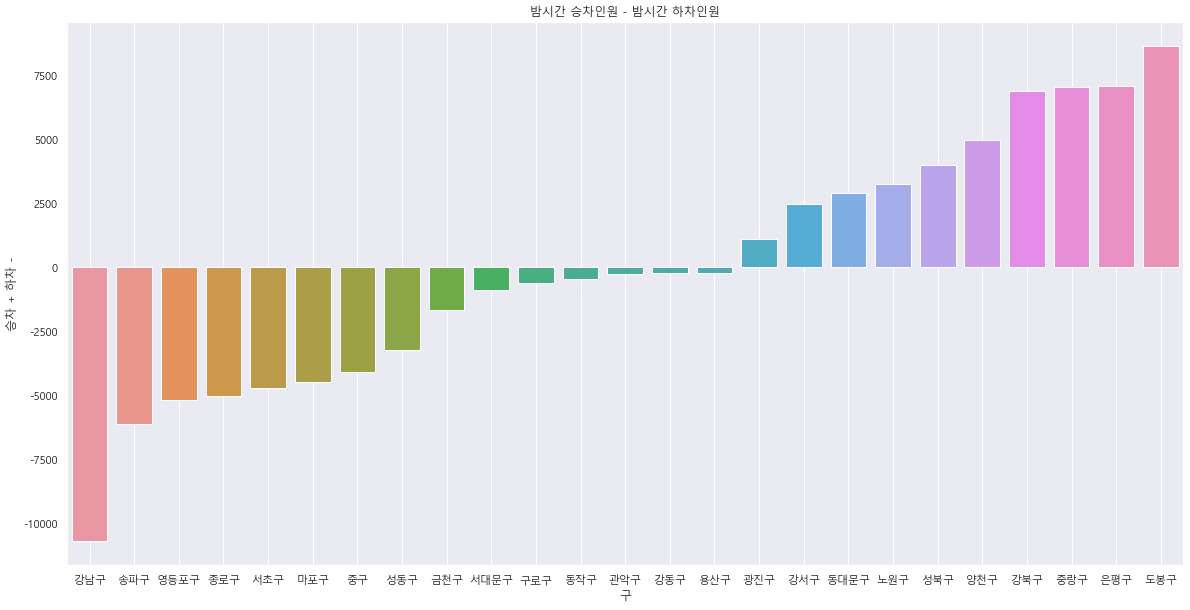

In [130]:
df____ =df_total['밤시간 승차인원'] - df_total['밤시간 하차인원']
df____ = df____.reset_index() 
df____ = df____.sort_values(by=0)
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
sns.barplot(x=df____['level_0'], y=df____[0],data=df___)
plt.title('밤시간 승차인원 - 밤시간 하차인원')
plt.xlabel('구')
plt.ylabel('승차 + 하차 -')
plt.grid()
plt.show()

출근시간에 승차가 많고 퇴근시간에 하차가 많은지역 -> 서대문구

출근시간 승차 많은 지역 (1. 종로구, 2. 중구, 3.용산구, 4.서대문구,5.마포구)

출근시간 하차 많은 지역 (1. 송파구, 2. 강동구, 3.강남구, 4.동작구,5.영등포구)

점심시간 승차 많은 지역 (1.종로구, 2. 용산구, 3.광진구, 4.성동구,5.중구)

점심시간 하차 많은 지역 (1.강동구, 2. 강남구, 3.송파구, 4.도봉구,5.서초구)

퇴근시간 승차 많은 지역 (1.양천구, 2.은평구,3.도봉구, 4.강북구,5.중량구)

퇴근시간 하차가 많은 지역 (1.강남구,2.서초구3.영등포구,4.동작구,5.서대문구)

밤시간 승차 많은 지역 (1.도봉구, 2.은평구,3.중량구, 4.강북구,5.양천구)

밤시간 하차가 많은 지역 (1.강남구,2.송파구3.영등포구,4.종로구,5.서초구)

In [131]:
df_total.corr()

,출근시간 승차인원,출근시간 하차인원,점심오후시간 승차인원,점심오후 하차인원,퇴근시간 승차인원,퇴근시간 하차인원,밤시간 승차인원,밤시간 하차인원
출근시간 승차인원,1.000000,0.863034,0.987116,0.846886,0.967297,0.973071,0.813409,0.934775
출근시간 하차인원,0.863034,1.000000,0.862783,0.949228,0.883960,0.919736,0.849422,0.905738
점심오후시간 승차인원,0.987116,0.862783,1.000000,0.854289,0.989528,0.968003,0.860562,0.940910
점심오후 하차인원,0.846886,0.949228,0.854289,1.000000,0.877937,0.905218,0.830787,0.921503
퇴근시간 승차인원,0.967297,0.883960,0.989528,0.877937,1.000000,0.966434,0.902046,0.949298
퇴근시간 하차인원,0.973071,0.919736,0.968003,0.905218,0.966434,1.000000,0.850556,0.963792
밤시간 승차인원,0.813409,0.849422,0.860562,0.830787,0.902046,0.850556,1.000000,0.842003
밤시간 하차인원,0.934775,0.905738,0.940910,0.921503,0.949298,0.963792,0.842003,1.000000


승하차총승객수 / 정류장수 비율로 구해 정류장수가 인구대비 낮은 구를 찾아보자.

In [132]:
df['승하차총승객수'] = df['승차총승객수'] + df['하차총승객수']

In [133]:
df['승하차총승객수 / 정류장수'] = df['정류장수'] / df['승하차총승객수'] * 100
df

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y,승하차총승객수,승하차총승객수 / 정류장수
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,10674329,0.003270
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,7375607,0.002413
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06,8276451,0.003903
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07,5554018,0.007832
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07,5502859,0.004888
5,11060,동대문구,306,73,5240565,5115379,131.841430,128.692017,22.149241,41.037280,5132710,9.509692e+06,10355944,0.002955
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,23.887741,43.639157,4635870,8.469008e+06,7533464,0.005044
7,11080,성북구,602,99,6236424,6231238,123.251922,123.149430,22.716321,48.931749,5232500,1.127099e+07,12467662,0.004828
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,24.355289,42.216319,4458260,7.727739e+06,9496964,0.004349
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,25.138206,40.194257,4086140,6.533456e+06,6515726,0.005510


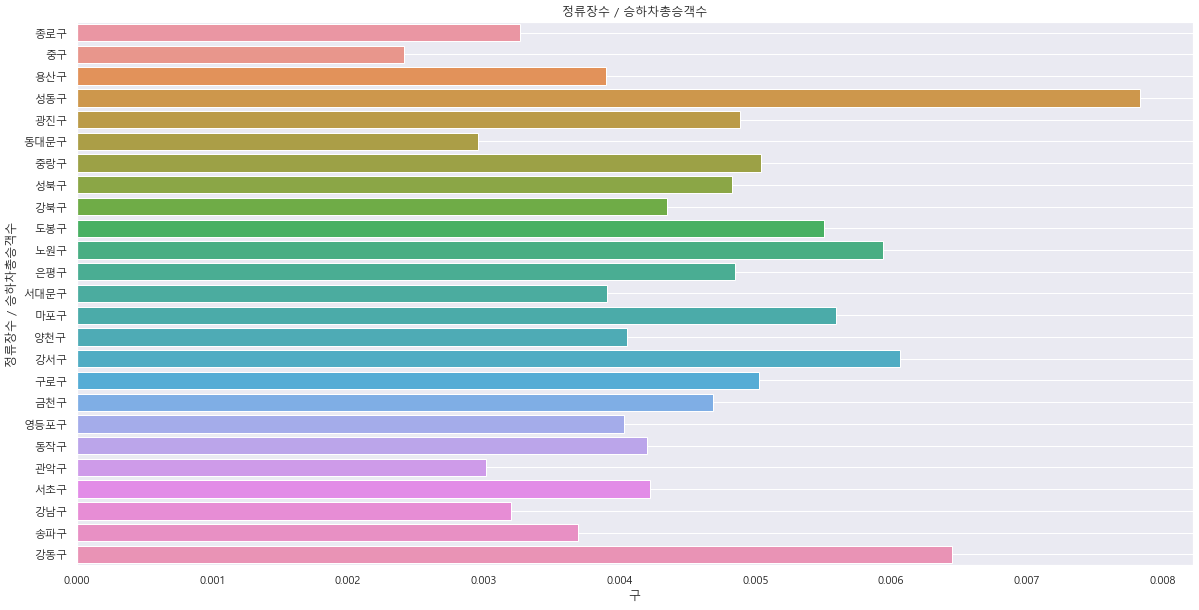

In [134]:
plt.figure(figsize=(20,10))
plt.rc('font', family='Malgun Gothic')
sns.barplot(x=df['승하차총승객수 / 정류장수'], y=df['자치구'],data=df)
plt.title('정류장수 / 승하차총승객수')
plt.xlabel('구')
plt.ylabel('정류장수 / 승하차총승객수')
plt.grid()
plt.show()

이동유형과 도착시간(출근, 점심, 퇴근. 밤)의 관계를 다범주 대 다범주로써 카이제곱검증실시 

이동유형은 WW(직장 -> 직장) HH(집 -> 집) HW(집 -> 일) WH(일 -> 집)을 제외한 나머지는 삭제해주었다.

In [135]:
seoul_pearsonr = seoul_moving.copy()

In [136]:
seoul_pearsonr.drop(seoul_pearsonr.loc[seoul_pearsonr['이동유형'] == 'WE'].index,inplace=True)
seoul_pearsonr.drop(seoul_pearsonr.loc[seoul_pearsonr['이동유형'] == 'HE'].index,inplace=True)
seoul_pearsonr.drop(seoul_pearsonr.loc[seoul_pearsonr['이동유형'] == 'EH'].index,inplace=True)
seoul_pearsonr.drop(seoul_pearsonr.loc[seoul_pearsonr['이동유형'] == 'EE'].index,inplace=True)
seoul_pearsonr.drop(seoul_pearsonr.loc[seoul_pearsonr['이동유형'] == 'EW'].index,inplace=True)

삭제 확인

In [137]:
seoul_pearsonr['이동유형'].unique()

array(['WH', 'HW', 'WW', 'HH'], dtype=object)

범주형 0,1,2,3으로 mapping

In [138]:
seoul_pearsonr['이동유형'] = seoul_pearsonr['이동유형'].map({
    'WH' : 0,
    'HW' : 1,
    'WW' : 2,
    'HH' : 3
})

출근시간 : 0 점심시간 : 1 퇴근시간 : 2 밤시간 : 3으로 mapping

In [139]:
seoul_pearsonr['도착시간'] = seoul_pearsonr['도착시간'].map({
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 1,
    12 : 1,
    13 : 1,
    14 : 1,
    15 : 1,
    16 : 2,
    17 : 2,
    18 : 2,
    19 : 2,
    20 : 3,
    21 : 3,
    22 : 3,
    23 : 3,
})

In [140]:
seoul_pearsonr

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
2,202204,일,0,은평구,마포구,F,35,0,10,3.04
4,202204,일,0,은평구,마포구,F,40,1,20,6.88
5,202204,일,0,은평구,마포구,F,45,1,10,16.65
7,202204,일,0,은평구,마포구,F,45,0,20,3.32
10,202204,일,0,은평구,마포구,F,50,1,20,21.99
...,...,...,...,...,...,...,...,...,...,...
5347096,202204,토,3,강동구,강동구,M,75,2,10,23.96
5347097,202204,토,3,강동구,강동구,M,75,3,40,5.93
5347100,202204,토,3,강동구,강동구,M,75,1,10,5.97
5347102,202204,토,3,강동구,강동구,M,75,0,10,83.42


다대다 범주 상관분석으므로 카이제곱실시

In [141]:
import scipy.stats as spst

In [142]:
# 먼저 집계
table = pd.crosstab(seoul_pearsonr['도착시간'], seoul_pearsonr['이동유형'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 이동유형       0       1       2      3
도착시간                               
0      66499  197694   58608  40980
1     161985  218694   87607  48950
2     242782  120832  104526  54036
3     168348   47258   45976  38819
----------------------------------------------------------------------------------------------------
카이제곱통계량 186671.27582405056
p-value 0.0
기대빈도
 [[136581.49801772 124807.9010128   63360.17089577  39031.43007371]
 [194196.14468236 177456.05044864  90087.61137454  55496.19349446]
 [196050.86661728 179150.89166081  90948.01706979  56026.22465212]
 [112785.49068264 103063.15687775  52321.2006599   32231.15177971]]
